<h1 style="text-align: center;"><b>Introduction to Neural Networks</b></h1>

### Keras and Tensorflow
Keras is a high-level neural networks API, written in Python, and capable of running on top of multiple backends, including TensorFlow, Theano, and CNTK. It is designed to enable fast experimentation with deep learning models, allowing users to quickly build, train, and deploy machine learning models with minimal coding effort. TensorFlow, on the other hand, is an open-source machine learning framework developed by Google. It provides a comprehensive ecosystem for building and deploying machine learning applications, ranging from research to production. Keras is tightly integrated with TensorFlow as its official high-level API, simplifying the process of creating complex neural network architectures. Together, Keras and TensorFlow offer a powerful yet user-friendly platform for both beginners and experts in the field of deep learning.

### Problem Statement: MNIST Handwritten Digit Classification
Objective:

Build a machine learning model to classify images of handwritten digits (0-9) from the MNIST dataset. The goal is to accurately predict the digit depicted in a given image.

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

### About dataset:

The MNIST (Modified National Institute of Standards and Technology) dataset is a popular dataset used for training and evaluating machine learning models, particularly in image classification tasks. It contains images of handwritten digits, making it an ideal starting point for exploring image classification and machine learning techniques.

In [2]:
# Load the MNIST dataset
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Normalisation

In [5]:
# Normalize the data (scale pixel values to [0, 1])
X_train = X_train / 255.0
X_test = X_test / 255.0

The value **255** is used because it is the maximum possible pixel value in an image represented in 8-bit grayscale.

---

#### 8-bit Grayscale Images:
- Each pixel in a grayscale image is represented by a value between **0** (black) and **255** (white).
- These values are stored as integers in an **8-bit format**, which can represent \(2^8 = 256\) levels of intensity (0 to 255).

---

#### Normalization:
- Neural networks work best with input values in a smaller and consistent range, such as **[0, 1]**.
- Dividing each pixel value by **255** scales the range of pixel values from **[0, 255]** to **[0, 1]**.
- This normalization helps improve the efficiency and stability of the training process by ensuring that the input features have a uniform scale.

---

### Why Normalize?
1. **Improved Training Stability**: Smaller input values prevent large gradient updates, which could destabilize the training process.
2. **Faster Convergence**: The optimizer can converge faster when inputs are normalized.
3. **Better Performance**: It often results in better model performance by reducing numerical instability in computations.

<font color=green size=4><b>Convert labels to one-hot encoding</b></font>

In [6]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

<font color=green size=4><b>Build the neural network model</b></font>

In [7]:
model=Sequential(
    [
        Flatten(input_shape=(28,28)),
        Dense(128,activation='relu'),
        Dense(64,activation='relu'),
        Dense(10,activation='softmax')
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Model Architecture:

Flatten Layer: Converts 28x28 images into a flat vector of 784 values.

Dense Layers: Fully connected layers with ReLU activation for non-linear transformations.

Output Layer: A Dense layer with 10 neurons (one for each digit class) and a softmax activation to output probabilities.

<font color=green size=4><b>Compile the model</b></font>

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

### Model Compilation:

Optimizer: Adam optimizer for adaptive learning.

Loss Function: Categorical Crossentropy for multi-class classification.

Metric: Accuracy to evaluate performance.

<font color=green size=4><b>Train the model</b></font>

In [9]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8591 - loss: 0.4779 - val_accuracy: 0.9560 - val_loss: 0.1492
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9614 - loss: 0.1266 - val_accuracy: 0.9692 - val_loss: 0.1027
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9763 - loss: 0.0780 - val_accuracy: 0.9703 - val_loss: 0.0968
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9824 - loss: 0.0556 - val_accuracy: 0.9719 - val_loss: 0.0977
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9860 - loss: 0.0454 - val_accuracy: 0.9726 - val_loss: 0.0925
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9895 - loss: 0.0344 - val_accuracy: 0.9776 - val_loss: 0.0831
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9918 - loss: 0.0271 - val_accuracy: 0.9710 - val_loss: 0.1056
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9931 - loss: 0.0228 -

### Training:

The model is trained for 10 epochs with a batch size of 32.
20% of the training data is used for validation during training.

<font color=green size=4><b>Evaluate the model</b></font>

In [10]:

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2%}")

Test Accuracy: 97.61%


### Evaluation and Prediction:

The model is evaluated on the test set to measure accuracy.
Predictions are made on the first 5 test images, and both predicted and actual classes are displayed.

<font color=green size=4><b>Predict the first 5 test images</b></font>

In [11]:
predictions = model.predict(X_test[:5])
predicted_classes = predictions.argmax(axis=1)
actual_classes = y_test[:5].argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [12]:
print("Predicted Classes: ", predicted_classes)
print("Actual Classes:    ", actual_classes)

Predicted Classes:  [7 2 1 0 4]
Actual Classes:     [7 2 1 0 4]


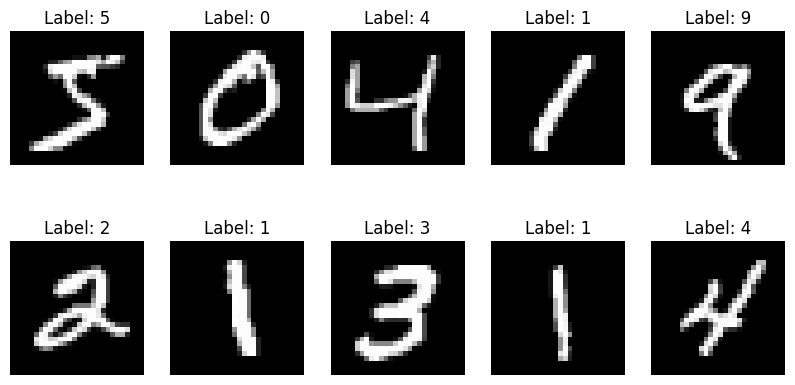

In [13]:
import matplotlib.pyplot as plt

# Visualize the first 10 images from the training set
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i].argmax()}")
    plt.axis('off')
plt.show()


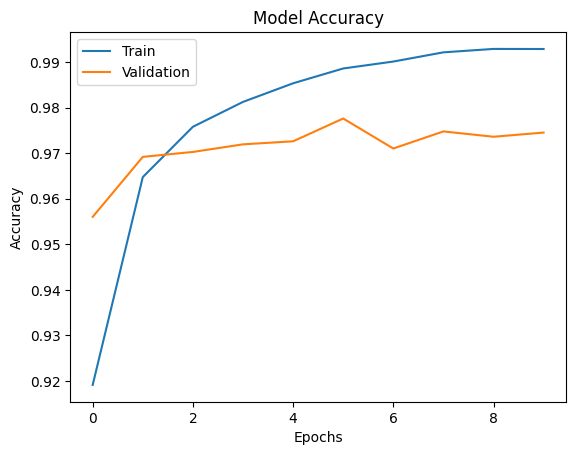

In [14]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


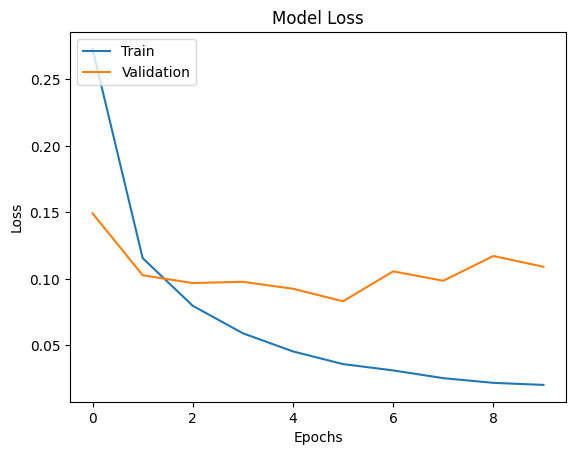

In [15]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


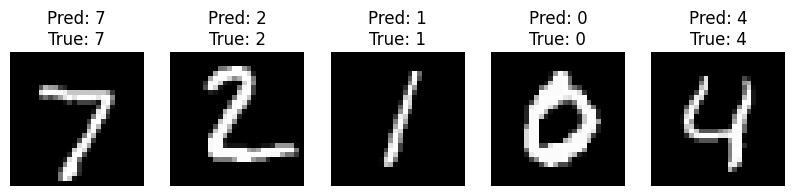

In [18]:
# Predict the classes on the test data
import numpy as np
y_pred = model.predict(X_test)  # Get predicted probabilities
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert to class labels

# True labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to integers

# Visualize some test predictions
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Pred: {y_pred_classes[i]}\nTrue: {y_true[i]}")
    plt.axis('off')
plt.show()
